In [1]:
# import required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import PoissonRegressor
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

popsize = pd.read_csv("PopEstimates.csv")

def find_popsize(HB,Q,popsize):
    year=Q[0:4]
    x=np.where(popsize['Health Board Code']==HB)
    popsize2=np.asarray(popsize[year])
    return popsize2[x]

# example


In [2]:
## define funciton that fits poisson regression



# build model

def poissonR(X,Y,train):
    '''
    inputs:
        X: explanatory variables (dataframe)
        Y: output variable (dataframe)
        train: do training or not (boolean)
        
    outputs:
        parameters: possion regressor parameters
        intercept: value of independetn term (y intercept), 
        coefficients: coefficients of explanatory vairables (all linera)
        y_test: testing data
        predictions: predicted data
        stats : summary of statistics of the predictive power of the model
    
    
    '''
    
    # turn categorical into dummies
    X = pd.get_dummies(data=X, drop_first=True)
    
    # build model
    pr = PoissonRegressor(alpha=0, fit_intercept=True)
    
    # fit model
    pr.fit(X, Y)
    parameters=pr.get_params()
    intercept=pr.intercept_
    coefficients= pd.DataFrame(pr.coef_,X.columns,columns=['Coefficient'])
    
    y_train=0
    predictions=0 
    stats=0
    
    if train==1:
        
        # split data into train and test (test_size specifies %)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
        
        # fit training
        pr.fit(X_train,y_train)
        
        # use model to predict
        predictions = pr.predict(X_test)

        X_train_Sm= sm.add_constant(X_train)
        ls=sm.OLS(y_train,X_train_Sm).fit()
        stats=ls.summary()
        
        

        
    
    return parameters, intercept, coefficients, y_test, predictions, stats
    


In [3]:
## import data frames

fullData = pd.read_csv("31DayDataModified.csv")
#myData = fullData[['Quarter', 'HB', 'CancerType','NumberOfEligibleReferrals31DayStandard','NumberOfEligibleReferralsTreatedWithin31Days']]

fullData2 = pd.read_csv("62DayDataModified.csv")
#myData2 = fullData2[['Quarter', 'HB', 'CancerType','NumberOfEligibleReferrals62DayStandard','NumberOfEligibleReferralsTreatedWithin62Days']]

#weekdata = pd.read_csv("cancerdata.csv")
popsize = pd.read_csv("PopEstimates.csv")
def find_popsize(HB,Q,popsize):
    year=Q[0:4]
    x=np.where(popsize['Health Board Code']==HB)
    popsize2=np.asarray(popsize[year])
    return popsize2[x]

In [4]:
fullData

,Unnamed: 0,Quarter,HB,CancerType,NumberOfEligibleReferrals31DayStandard,NumberOfEligibleReferralsTreatedWithin31Days,Date,DateSquared,Pandemic
0,1,2012Q1,S08000015,Breast,176.0,176.0,0,0,0
1,2,2012Q1,S08000015,Cervical,10.0,10.0,0,0,0
2,3,2012Q1,S08000015,Colorectal,112.0,110.0,0,0,0
3,4,2012Q1,S08000015,Head & Neck,34.0,32.0,0,0,0
4,5,2012Q1,S08000015,Lung,148.0,148.0,0,0,0
...,...,...,...,...,...,...,...,...,...
4994,5540,2021Q3,S08000032,Lymphoma,56.0,56.0,38,1444,6
4995,5541,2021Q3,S08000032,Melanoma,70.0,70.0,38,1444,6
4996,5542,2021Q3,S08000032,Ovarian,30.0,30.0,38,1444,6
4997,5543,2021Q3,S08000032,Upper GI,106.0,106.0,38,1444,6


In [5]:

x=np.where(popsize['Health Board Code']=='S08000017')
popsize2=np.asarray(popsize['2001'])
popsize2[x]

array([147780])

In [6]:
popsize
fullData

def find_popsize(HB,Q,popsize):
    year=Q[0:4]
    x=np.where(popsize['Health Board Code']==HB)
    popsize2=np.asarray(popsize[year])
    return popsize2[x]

find_popsize('S08000017','2016Q3',popsize)

array([149520])

In [7]:
myData

NameError: name 'myData' is not defined

In [12]:
## edit 31 days data

df=fullData

# remove Nans
df = df[df['NumberOfEligibleReferrals31DayStandard'].notna()]
df = df[df['NumberOfEligibleReferralsTreatedWithin31Days'].notna()]

# remove 'all cancer types' from data
df = df[df['CancerType'] != 'All Cancer Types']

# add a numerical variable 1-1 to quarters and an index variable before/after pandemic
quarters=df['Quarter']
HBs=np.asarray(df['HB'])
date=np.zeros(len(quarters))
quars=df['Quarter'].unique()
dates=np.arange(len(quars))
pandemic=np.zeros(len(quarters))

pandemicRecovery=np.zeros(len(quarters))
x=np.where(quars=='2020Q1') # change to decide in which quarter the pandemic begins
pandemic=np.zeros(len(quarters))
x=np.where(quars=='2020Q1')
j=0
pop_size=np.zeros(len(quarters))


z = np.where(quars == '2021Q1') # change to decide where recovery from pandemic begins.


   
    
for i in np.arange(len(quarters)):
    Q=np.asarray(quarters)[i]
    HB=HBs[i]
    pop_size[i]=find_popsize(HB,Q,popsize)
    y=np.where(quars==quarters[i])
 
    date[i]=dates[y]
    if dates[y]>x and dates[y]<z:
        pandemic[i]=dates[y]-x
    elif dates[y] > z:
        pandemicRecovery[i] = dates[y]-z
        
        
df['PopSize']=pop_size.tolist()
df['PandemicRecovery'] =pandemicRecovery.tolist()


df['Pandemic'] =pandemic.tolist()






In [13]:
df

,Unnamed: 0,Quarter,HB,CancerType,NumberOfEligibleReferrals31DayStandard,NumberOfEligibleReferralsTreatedWithin31Days,Date,DateSquared,Pandemic,PopSize,PandemicRecovery
0,1,2012Q1,S08000015,Breast,176.0,176.0,0,0,0.0,373220.0,0.0
1,2,2012Q1,S08000015,Cervical,10.0,10.0,0,0,0.0,373220.0,0.0
2,3,2012Q1,S08000015,Colorectal,112.0,110.0,0,0,0.0,373220.0,0.0
3,4,2012Q1,S08000015,Head & Neck,34.0,32.0,0,0,0.0,373220.0,0.0
4,5,2012Q1,S08000015,Lung,148.0,148.0,0,0,0.0,373220.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4994,5540,2021Q3,S08000032,Lymphoma,56.0,56.0,38,1444,0.0,661960.0,2.0
4995,5541,2021Q3,S08000032,Melanoma,70.0,70.0,38,1444,0.0,661960.0,2.0
4996,5542,2021Q3,S08000032,Ovarian,30.0,30.0,38,1444,0.0,661960.0,2.0
4997,5543,2021Q3,S08000032,Upper GI,106.0,106.0,38,1444,0.0,661960.0,2.0


In [14]:






df1=fullData2
df1 = df1[df1['NumberOfEligibleReferrals62DayStandard'].notna()]
df1 = df1[df1['NumberOfEligibleReferralsTreatedWithin62Days'].notna()]

df1 = df1[df1['CancerType'] != 'All Cancer Types']
quarters=df1['Quarter']
HBs=np.asarray(df['HB'])
date=np.zeros(len(quarters))
quars=df1['Quarter'].unique()
dates=np.arange(len(quars))
pandemic=np.zeros(len(quarters))
pandemicRecovery=np.zeros(len(quarters))
x=np.where(quars=='2020Q1') # change to decide in which quarter the pandemic begins
pandemic=np.zeros(len(quarters))
x=np.where(quars=='2020Q1')
j=0
pop_size=np.zeros(len(quarters))


z = np.where(quars == '2021Q1') # change to decide where recovery from pandemic begins.


   
    
for i in np.arange(len(quarters)):
    Q=np.asarray(quarters)[i]
    HB=HBs[i]
    pop_size[i]=find_popsize(HB,Q,popsize)
    y=np.where(quars==quarters[i])
 
    date[i]=dates[y]
    if dates[y]>x and dates[y]<z:
        pandemic[i]=dates[y]-x
    elif dates[y] > z:
        pandemicRecovery[i] = dates[y]-z
        
        
df1['PopSize']=pop_size.tolist()
df1['PandemicRecovery'] =pandemicRecovery.tolist()

df['Pandemic'] =pandemic.tolist()
#df1['Date'] =date.tolist()

#df1['Pandemic'] =pandemic.tolist()




#df1['DateSquared'] = [i**2 for i in dates]

## edit weekly data

df2=weekdata
df2 = df2[df2['Count'].notna()]

months=np.asarray(df2['Month'])
date=np.zeros(len(months))
quars=df2['Month'].unique()
dates=np.arange(len(quars))
pandemic=np.zeros(len(months))
x=np.where(quars==202002)

for i in np.arange(len(months)):
    
    y=np.where(quars==months[i])
    date[i]=dates[y]
    if dates[y]>x:
        pandemic[i]=dates[y]-x
        
        
df2['Date'] =date.tolist()

df2['Pandemic'] =pandemic.tolist()


df2 = df2[df2['CancerType'] != 'All Cancers']
df2 = df2[df2['Age Group'] != 'All Ages']
df2 = df2[df2['Sex'] != 'All']


ValueError: Length of values (4824) does not match length of index (4999)

In [15]:

df.to_csv('31days_complete.csv')
df1.to_csv('62days_complete.csv')

                                              NumberOfEligibleReferrals31DayStandard  \
NumberOfEligibleReferrals31DayStandard                                      1.000000   
NumberOfEligibleReferralsTreatedWithin31Days                                0.997654   
Date                                                                        0.011029   
Pandemic                                                                    0.002291   

                                              NumberOfEligibleReferralsTreatedWithin31Days  \
NumberOfEligibleReferrals31DayStandard                                            0.997654   
NumberOfEligibleReferralsTreatedWithin31Days                                      1.000000   
Date                                                                              0.008971   
Pandemic                                                                          0.005829   

                                                  Date  Pandemic  
NumberOfEligibleRefer

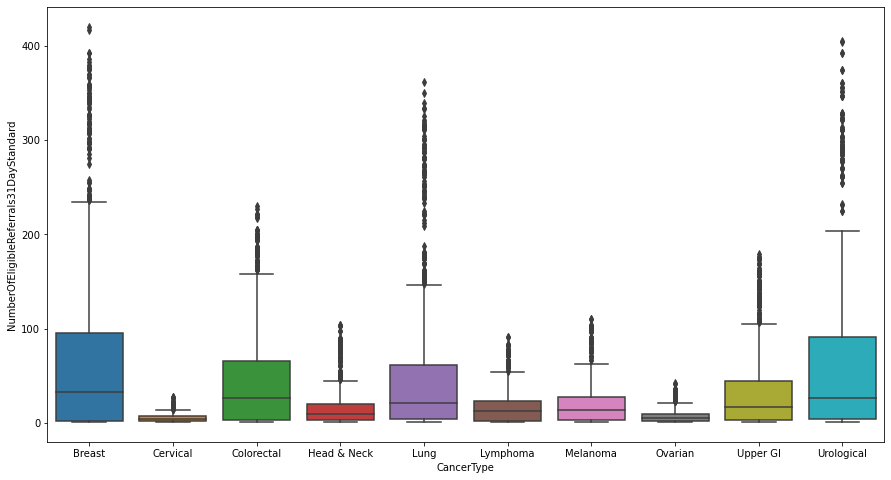

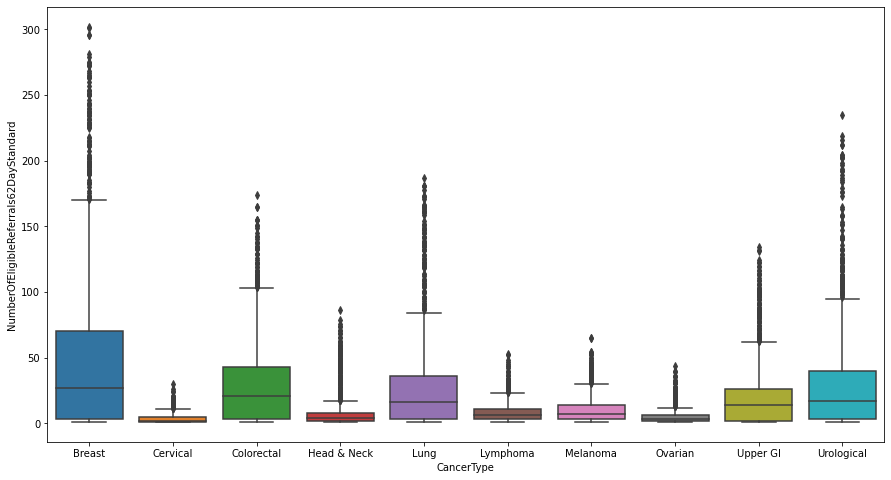

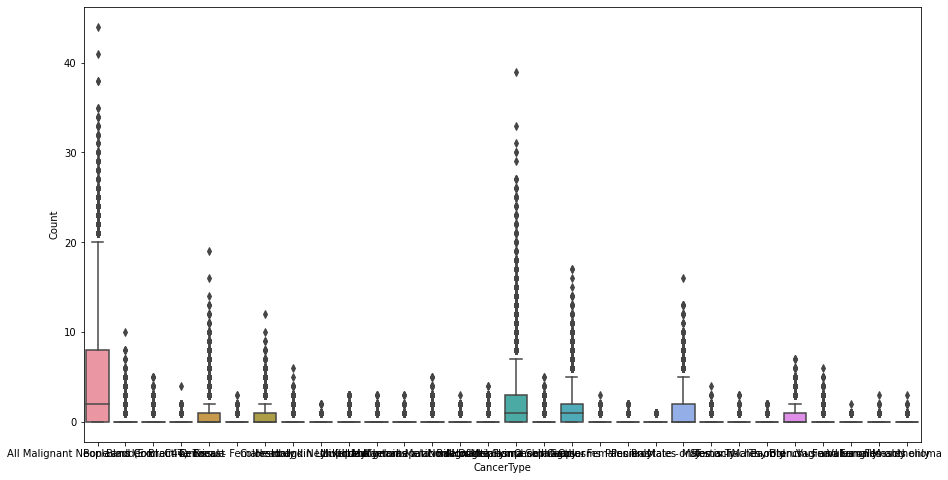

In [23]:
# take a look at what we have

print(df.corr())

print(df1.corr())

print(df2.corr())

# plot eligibles per cancer type
plt.figure(figsize=(15,8))
ax =sns.boxplot(y='NumberOfEligibleReferrals31DayStandard',x='CancerType',data=df)
plt.show()

plt.figure(figsize=(15,8))
ax =sns.boxplot(y='NumberOfEligibleReferrals62DayStandard',x='CancerType',data=df1)
plt.show()

plt.figure(figsize=(15,8))
ax =sns.boxplot(y='Count',x='CancerType',data=df2) # we need to group cancer types!!
plt.show()

In [24]:
x=np.asarray(df['NumberOfEligibleReferralsTreatedWithin31Days'])

In [ ]:
pelt_search(x)

In [102]:
## BUILD GLMS 

# FOR 31 DAYS DATA

# choose explanatory variables
X0 = df[['Date','CancerType','HB']] # no pandemic
X0_p = df[['Pandemic','CancerType','HB']] # pandemic, no data
X0_dp = df[['Date','Pandemic','CancerType','HB']] # both
# choose output data
Y0 = df['NumberOfEligibleReferrals31DayStandard']
Y0t=df['NumberOfEligibleReferralsTreatedWithin31Days']


## FOR 62 DAYS DATA

# choose explanatory variables
X1 = df1[['Date','HB','CancerType']]#, 'CancerType', 'Sex']]
X1_p = df1[['Pandemic','CancerType','HB']]
X1_dp = df1[['Date','Pandemic','CancerType','HB']]
# choose output data
Y1 = df1['NumberOfEligibleReferrals62DayStandard']

Y1t=df1['NumberOfEligibleReferralsTreatedWithin62Days']


## FOR WEEKLY DIAGNOSIS DATA

X2= df2[['Date','HB', 'Sex','Age Group']]
X2_p = df2[['Pandemic','HB', 'Sex','Age Group']]
X2_dp = df2[['Pandemic','Date','HB', 'Sex','Age Group']]
Y2 = df2['Count']



In [103]:
print(df2['CancerType'].unique())
df['CancerType'].unique()

['All Malignant Neoplasms (Excl. C44)' 'Bladder'
 'Bone and Connective Tissue' 'Brain Tumour' 'Breast'
 'Cervical - Females only' 'Colorectal' 'Head and Neck' 'Hodgkin Lymphoma'
 'Kidney' 'Leukaemias' 'Liver and Intrahepatic Bile Ducts'
 'Malignant Melanoma of the Skin'
 'Multiple Myeloma and malignant plasma cell neoplasms'
 'Non-Hodgkin lymphoma' 'Non-Melanoma Skin Cancer' 'Oesophagus' 'Other'
 'Ovary - Females only' 'Pancreas' 'Penis - Males only'
 'Prostate - Males only' 'Stomach' 'Testis - Males only' 'Thyroid'
 'Trachea, Bronchus and Lung' 'Uterus - Females only'
 'Vagina - Females only' 'Vulva - Females only' 'Mesothelioma']


array(['Breast', 'Cervical', 'Colorectal', 'Head & Neck', 'Lung',
       'Lymphoma', 'Melanoma', 'Ovarian', 'Upper GI', 'Urological'],
      dtype=object)

In [105]:
# choose data
X=X1_dp
Y=Y1t

# run poisson regression for chosen data
parameters, intercept, coefficients, y_test, predictions, stats = poissonR(X,Y,1)

/home/s1657372/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/home/s1657372/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [107]:
# take a look at results
print(intercept)

print(coefficients)


3.152776953504845
                        Coefficient
Date                       0.001319
Pandemic                   0.004255
CancerType_Cervical       -2.691307
CancerType_Colorectal     -0.548892
CancerType_Head & Neck    -1.653507
CancerType_Lung           -0.507294
CancerType_Lymphoma       -1.777639
CancerType_Melanoma       -1.487803
CancerType_Ovarian        -2.223721
CancerType_Upper GI       -0.744760
CancerType_Urological     -0.569196
HB_S08000016              -0.711318
HB_S08000017              -0.574414
HB_S08000019              -0.069320
HB_S08000020               0.880404
HB_S08000022              -0.063810
HB_S08000024               1.138538
HB_S08000025              -1.343974
HB_S08000026              -1.550636
HB_S08000028              -1.658616
HB_S08000029              -0.006767
HB_S08000030               0.530995
HB_S08000031               1.453391
HB_S08000032               0.330460
HB_S92000003               0.890312


/home/s1657372/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                                         OLS Regression Results                                         
Dep. Variable:     NumberOfEligibleReferralsTreatedWithin62Days   R-squared:                       0.317
Model:                                                      OLS   Adj. R-squared:                  0.315
Method:                                           Least Squares   F-statistic:                     136.3
Date:                                          Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                                                  11:30:31   Log-Likelihood:                -34110.
No. Observations:                                          7350   AIC:                         6.827e+04
Df Residuals:                                              7324   BIC:                         6.845e+04
Df Model:                                                    25                                         
Covariance Type:                                      n

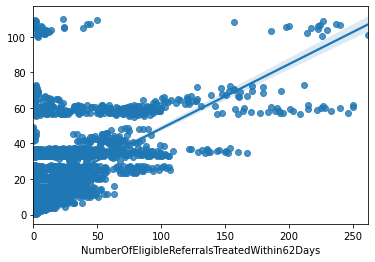

In [108]:
# check predictive power
sns.regplot(y_test,predictions)


print(stats)

